In [1]:
import pandas as pd
import numpy as np

In [2]:
olympics = pd.read_csv("athlete_events.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
olympics.describe()

<ipython-input-3-bd6062ad0065>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
#describe categorical
olympics.describe(exclude=[np.number])


,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,won_medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783,271116
unique,134732,2,1184,230,51,2,42,66,765,3,2
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold,False
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372,231333


In [4]:
#is na and invert to see if he/she won a medal
olympics["won_medal"] = pd.isna(olympics["Medal"])
olympics["won_medal"] = ~olympics["won_medal"]

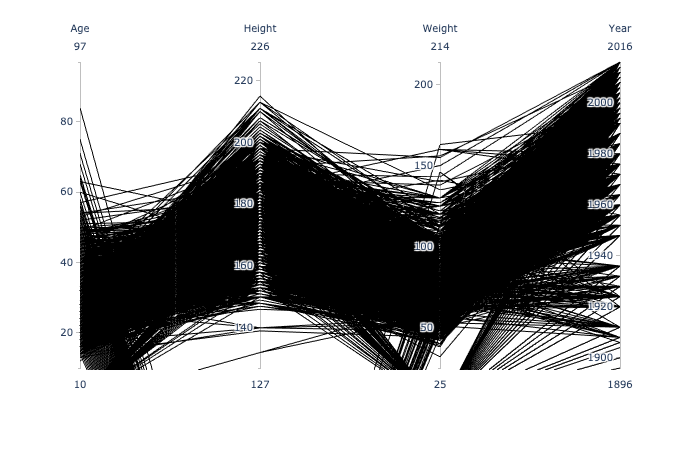

In [7]:
import plotly.express as px
fig = px.parallel_coordinates(olympics, color="won_medal", color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=4000000,
                              dimensions=["Age","Height","Weight","Year"
                                          ],
                              width=1000)
#fig.update_xaxes(tickangle=45)
fig.show(renderer="png")

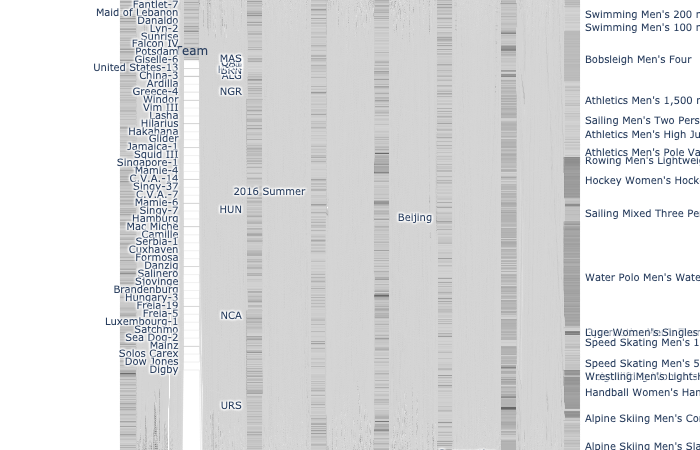

In [8]:
fig = px.parallel_categories(olympics, color="won_medal",
                             dimensions=["Sex","Team","NOC","Games","Season","City","Sport","Event"]
                             ,width=1000
                             )
fig.show(renderer="png")

In [5]:
#select required columns
df = olympics[["won_medal","Age","Height","Weight","Year","Sex","Team","NOC","Games","Season","City","Sport","Event"]]

In [6]:
from pycaret.classification import *
# Enter 1 for classification in the prompt
reg1 = setup(data = df, target = 'won_medal',
             pca=False,
             train_size=0.7,
             #feature_interaction=True,
             #remove_multicollinearity=True,
             #feature_selection=True,
             #feature_selection_method = 'boruta',
             #polynomial_features=False,
             session_id=32871,fold_shuffle=True,
             #profile=True
             )

,Description,Value
0,session_id,32871
1,Target,won_medal
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(271116, 13)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [ ]:
ranked=compare_models()
ranked

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:07:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
